# 규제 선형 모델

- 다항식이 복잡해지면서 회귀 계수값이 크게 설정되고 과대 적합을 유발함
    - > 훈련 데이터에서는 높은 성능을 보이지만, 테스트 데이터에서는 낮은 성능을 보임
- 선형 모델의 목적은 비용 함수를 최소화하는 것
- 이때, 규제 선형 모델은 비용 함수를 최소화 하는 데에 패널티(alpha)를 적용해 회귀 계수의 크기를 제한함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Ridge 회귀
- L2 규제를 적용한 회귀 모델
- 회귀 계수들의 제곱합에 alpha 패널티를 곱해 비용 산정에 반영
- alpha 값이 커지면 회귀 계수가 작아짐 -> 과대 적합 방지

In [5]:
from sklearn.model_selection import train_test_split

boston_df = pd.read_csv('./data/boston_housing_train.csv')

X = boston_df.drop('MEDV', axis=1)
y = boston_df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=1)

reg.fit(X_train, y_train)
print(reg.score(X_train, y_train), reg.score(X_test, y_test))

print(reg.coef_)

# alpha 값이 커지면 일반적으로 회귀계수는 작아짐짐
# alpha = 10
# 0.7398240895568371 0.6724237562438147
# [-0.12137453  0.03421897 -0.01307037  1.8210257  -1.68747299  4.09010212
#  -0.01841796 -1.18806788  0.24351944 -0.01208251 -0.76717881  0.01369631
#  -0.5734354 ]


0.7461161787884155 0.678974832784608
[-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]


In [7]:
reg.alpha

1.0

In [16]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'MES : {mse}, RMSE : {rmse}, MAE : {mae}, R2: {r2}')

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures # 다항 회귀

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', Ridge(alpha=1000)) # 규제 강도(alpha)가 높아질수록 과대적합에 강해짐
])

model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))
print(evaluate_regression(y_test, model.predict(X_test)))

0.9082670961763193 0.8090409130522977
MES : 13.372319413778287, RMSE : 3.6568182090142636, MAE : 2.485387510012996, R2: 0.8090409130522977
None


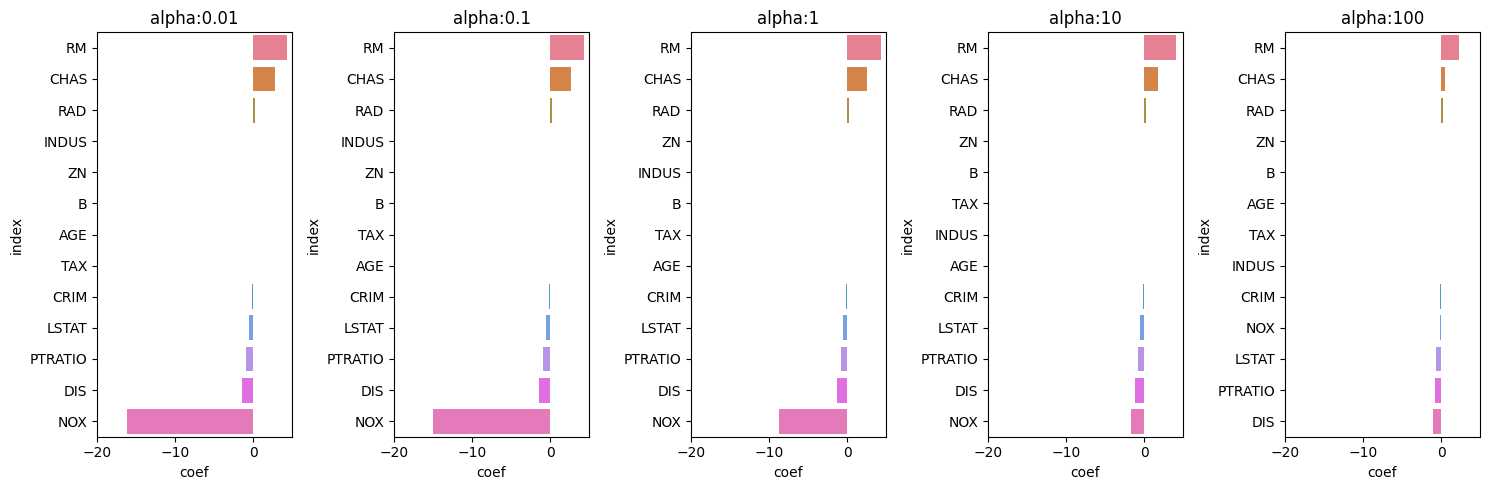

In [27]:
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,5))

alphas= [0.01,0.1,1,10,100]

for i,alpha in enumerate(alphas):
    model = Pipeline([
        # ('poly',PolynomialFeatures(degree=2, include_bias=False)),
        ('reg',Ridge(alpha=alpha))
    ])
    model.fit(X_train,y_train)

    coef = model.named_steps['reg'].coef_
    coef_ser = pd.Series(coef, index=X.columns)
    coef_ser.name = 'alpha:'+str(alpha)
    coef_ser = coef_ser.sort_values(ascending=False)

    ax[i].set_title(coef_ser.name)
    ax[i].set_xlabel('coef')
    ax[i].set_ylabel('index')
    ax[i].set_xlim(-20,5)
    sns.barplot(x=coef_ser.values, y=coef_ser.index,ax=ax[i],hue=coef_ser.index)

plt.tight_layout()
plt.show()

### Lasso 회귀
- L1 규제를 적용한 선형 회귀 모델
- 회귀계수 절대값의 합을 alpha 값과 곱해 규제 정도 지정
- alpha 값이 커지면 규제 정도가 커짐
- 회귀 계수를 0까지 줄일 수 있음 = 해당 특성을 아예 반영하지 않도록 함 = 특성 선택 효과가 있음

In [29]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=10)

reg.fit(X_train, y_train)

print(reg.score(X_train, y_train), reg.score(X_test, y_test))

print(reg.coef_)

0.5373948270602298 0.49459972513091244
[-0.          0.00806625 -0.          0.          0.          0.
  0.         -0.          0.         -0.00896833 -0.          0.01014021
 -0.62986968]


### ElasticNet 회귀
- L1, L2 규제를 함께 적용할 수 있는 회귀 모델

**하이퍼 파라미터**
- alpha : 규제 정도 (L1, L2)
- L1_ratio : alpha값 중 L1규제의 비율

In [32]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet(alpha=1, l1_ratio=0.2) # reg.alpha 기본값 : 1, reg.li_ratio 기본값 0.5

reg.fit(X_train, y_train)

print(reg.score(X_train, y_train), reg.score(X_test, y_test))

print(reg.coef_)


0.6914758177681419 0.6584782663638298
[-0.11304195  0.03616532 -0.02567739  0.01331622 -0.          1.08071656
  0.01537004 -0.76232832  0.28676237 -0.01396857 -0.76004478  0.01203943
 -0.78366959]


In [33]:
model = Pipeline([
        ('poly',PolynomialFeatures(degree=3, include_bias=False)),
        ('reg',Ridge(alpha=alpha))
    ])
model.fit(X_train,y_train)


print(reg.score(X_train, y_train), reg.score(X_test, y_test))
print(evaluate_regression(y_test, model.predict(X_test)))

0.6914758177681419 0.6584782663638298
MES : 1529.9997735603922, RMSE : 39.11521153669493, MAE : 12.942526426615224, R2: -20.848667441210427
None


c:\Users\Playdata\AppData\Local\anaconda3\envs\sky_env\Lib\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
